In [57]:
import networkx as nx
import matplotlib.pyplot as plt
g = nx.DiGraph()
g.clear()

In [58]:
g.add_nodes_from(["user", 
                  "loadgenerator", 
                  "frontend", 
                  "checkout", 
                  "ad", 
                  "recommendation", 
                  "payment", 
                  "email", 
                  "productcatalog", 
                  "shipping", 
                  "currency", 
                  "cart", 
                  "rediscache"])

In [59]:
list(g.nodes)

['user',
 'loadgenerator',
 'frontend',
 'checkout',
 'ad',
 'recommendation',
 'payment',
 'email',
 'productcatalog',
 'shipping',
 'currency',
 'cart',
 'rediscache']

In [60]:
g.add_edge("user", "frontend")
g.add_edge("loadgenerator", "frontend")
g.add_edge("frontend", "checkout")
g.add_edge("frontend", "ad")
g.add_edge("frontend", "recommendation")
g.add_edge("frontend", "productcatalog")
g.add_edge("frontend", "cart")
g.add_edge("frontend", "shipping")
g.add_edge("frontend", "currency")
g.add_edge("checkout", "productcatalog")
g.add_edge("checkout", "cart")
g.add_edge("checkout", "shipping")
g.add_edge("checkout", "currency")
g.add_edge("checkout", "payment")
g.add_edge("checkout", "email")
g.add_edge("recommendation", "productcatalog")
g.add_edge("cart", "rediscache")

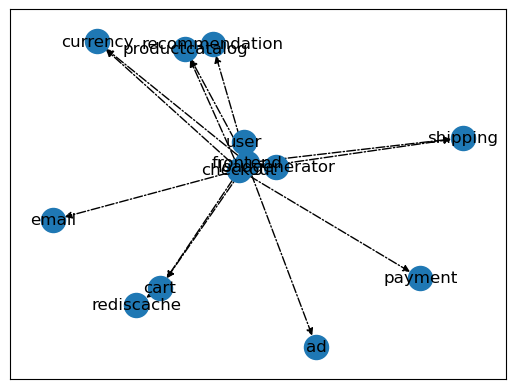

In [70]:
import matplotlib.pyplot as plt #note that we will get to plotly eventually, just need to figure out how to use networkx first
subax1 = plt.subplot(111) #none of these numbers can be one
pos = nx.spring_layout(g)
#nx.draw(g,pos, with_labels=True)
nx.draw_networkx(g, with_labels=True, arrows=True, arrowsize=10, style="-.", pos=pos)